In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn import tree
from sklearn.metrics import plot_roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict

# Airline Passenger Satisfaction

- **Gender**: Gender of the passengers (Female, Male)

- **Customer Type**: The customer type (Loyal customer, disloyal customer)

- **Age**: The actual age of the passengers

- **Type of Travel**: Purpose of the flight of the passengers (Personal Travel, Business Travel)

- **Class**: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

- **Flight distance**: The flight distance of this journey

- **Inflight wifi service**: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

- **Departure/Arrival time convenient**: Satisfaction level of Departure/Arrival time convenient

- **Ease of Online booking**: Satisfaction level of online booking

- **Gate location**: Satisfaction level of Gate location

- **Food and drink**: Satisfaction level of Food and drink

- **Online boarding**: Satisfaction level of online boarding

- **Seat comfort**: Satisfaction level of Seat comfort

- **Inflight entertainment**: Satisfaction level of inflight entertainment

- **On-board service**: Satisfaction level of On-board service

- **Leg room service**: Satisfaction level of Leg room service

- **Baggage handling**: Satisfaction level of baggage handling

- **Check-in service**: Satisfaction level of Check-in service

- **Inflight service**: Satisfaction level of inflight service

- **Cleanliness**: Satisfaction level of Cleanliness

- **Departure Delay in Minutes**: Minutes delayed when departure

- **Arrival Delay in Minutes**: Minutes delayed when Arrival

- **Satisfaction**: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

# Read data

In [ ]:
df = pd.read_csv('Airline_2.csv')
df.shape

(64940, 23)

In [ ]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,69,Personal Travel,Eco,762,3,3,3,4,3,4,4,2,2,3,2,2,2,2,0,0.0,neutral or dissatisfied
1,Female,Loyal Customer,37,Business travel,Eco,102,4,5,5,5,4,4,4,4,4,4,1,4,2,4,0,0.0,neutral or dissatisfied
2,Male,disloyal Customer,26,Business travel,Business,2475,1,2,2,1,2,1,1,4,3,5,5,1,3,1,0,6.0,neutral or dissatisfied
3,Female,Loyal Customer,47,Personal Travel,Eco,628,2,4,2,2,2,5,1,5,5,2,2,5,5,5,0,0.0,neutral or dissatisfied
4,Male,disloyal Customer,27,Business travel,Eco,1034,2,2,2,1,2,2,2,3,1,4,2,2,3,2,160,134.0,neutral or dissatisfied


**ตรวจสอบ categorical ว่าประกอบไปด้วยอะค่าไรบ้าง**

In [ ]:
# your code here


['Female' 'Male']
['Loyal Customer' 'disloyal Customer']
['Personal Travel' 'Business travel']
['Eco' 'Business' 'Eco Plus']
['neutral or dissatisfied' 'satisfied']


**แปลง categorical เป็น numerical**
```
Gender: 'Male':1, 'Female':0
Customer Type: 'Loyal Customer':1, 'disloyal Customer':0
Type of Travel: 'Business travel':1, 'Personal Travel': 0
satisfaction: 'satisfied':1, 'neutral or dissatisfied':0
```

In [ ]:
# your code here


In [ ]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,1,69,0,Eco,762,3,3,3,4,3,4,4,2,2,3,2,2,2,2,0,0.0,0
1,0,1,37,1,Eco,102,4,5,5,5,4,4,4,4,4,4,1,4,2,4,0,0.0,0
2,1,0,26,1,Business,2475,1,2,2,1,2,1,1,4,3,5,5,1,3,1,0,6.0,0
3,0,1,47,0,Eco,628,2,4,2,2,2,5,1,5,5,2,2,5,5,5,0,0.0,0
4,1,0,27,1,Eco,1034,2,2,2,1,2,2,2,3,1,4,2,2,3,2,160,134.0,0


**ทำ ont-hot encoding สำหรับ `class`**

In [ ]:
# your code here

In [ ]:
df

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,class_Business,class_Eco,class_Eco Plus
0,0,1,69,0,762,3,3,3,4,3,4,4,2,2,3,2,2,2,2,0,0.0,0,0,1,0
1,0,1,37,1,102,4,5,5,5,4,4,4,4,4,4,1,4,2,4,0,0.0,0,0,1,0
2,1,0,26,1,2475,1,2,2,1,2,1,1,4,3,5,5,1,3,1,0,6.0,0,1,0,0
3,0,1,47,0,628,2,4,2,2,2,5,1,5,5,2,2,5,5,5,0,0.0,0,0,1,0
4,1,0,27,1,1034,2,2,2,1,2,2,2,3,1,4,2,2,3,2,160,134.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64935,0,1,16,1,2402,2,2,2,2,5,5,5,5,4,2,5,3,4,5,0,0.0,1,1,0,0
64936,0,1,29,1,2026,1,3,1,1,5,5,5,5,4,1,3,2,4,5,13,12.0,1,1,0,0
64937,1,1,41,1,1180,3,3,3,3,5,5,5,3,2,4,4,5,4,5,132,130.0,1,1,0,0
64938,1,1,44,1,236,3,3,3,3,4,4,4,4,4,4,4,4,4,5,0,0.0,1,1,0,0


**ตรวจสอบว่าข้อมูลมีค่าว่างหรือไม่**

In [ ]:
# your code here

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             201
satisfaction                           0
class_Business                         0
class_Eco                              0
class_Eco Plus  

In [ ]:
# Drop nan values
# your code here

In [ ]:
df.shape

(64739, 25)

**ดูความสัมพันธ์ระหว่างตัวแปร Spearman's Correlation**

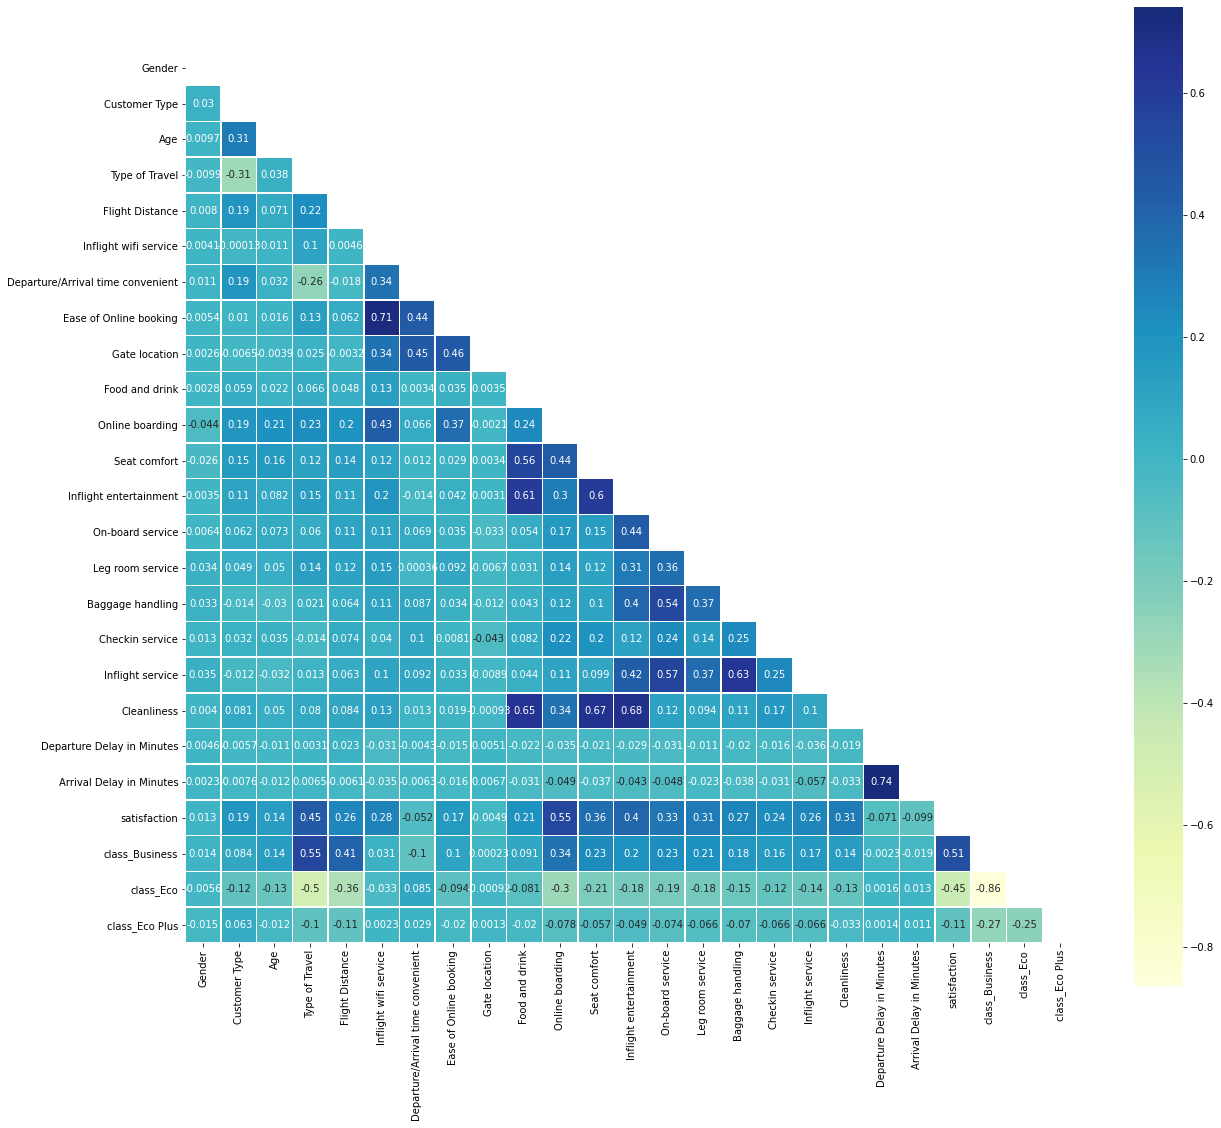

In [ ]:
corr = df.corr(method='spearman')
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 18))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot = True, mask=mask, cmap="YlGnBu", center=0,
            square=True, linewidths=.5)

# Train Test Split

กำหนดตัวแปรต้น (X) และตัวแปรตาม (y)

In [ ]:
# your code here


สร้าง Training Data และ Testing Data โดยกำหนด `test_size=0.2` และ `random_state=10`

In [ ]:
# your code here


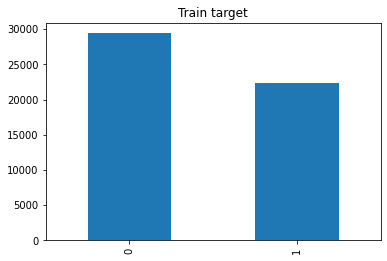

In [ ]:
plt.title('Train target')
y_train.value_counts().plot(kind='bar')

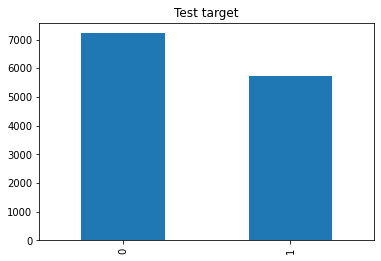

In [ ]:
plt.title('Test target')
y_test.value_counts().plot(kind='bar')

In [ ]:
X_train

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,class_Business,class_Eco,class_Eco Plus
31364,1,1,27,0,983,3,4,3,1,1,3,2,1,5,2,5,4,5,1,0,0.0,0,1,0
10679,0,1,47,1,1041,2,2,2,2,1,4,4,2,2,2,2,2,2,2,4,20.0,0,1,0
49277,1,1,44,1,3795,5,5,5,5,3,5,5,4,4,4,4,4,4,3,0,0.0,1,0,0
32300,1,1,9,0,1035,2,4,2,3,5,2,5,5,3,3,4,5,4,5,12,0.0,0,1,0
44069,0,1,41,1,2084,1,1,1,1,5,5,4,4,4,5,4,4,4,5,0,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28017,1,1,55,0,374,4,4,4,1,3,4,3,3,5,4,4,3,5,3,0,0.0,0,1,0
50496,1,1,60,1,1635,2,2,2,2,3,5,5,4,4,4,4,4,4,3,0,3.0,1,0,0
29199,0,0,26,1,631,4,2,4,3,5,4,5,5,1,4,4,1,4,5,0,0.0,0,1,0
40061,0,1,41,1,1657,2,2,2,2,5,4,5,4,4,4,4,5,4,4,0,0.0,1,0,0


**Plot histogram สำหรับทุก features**

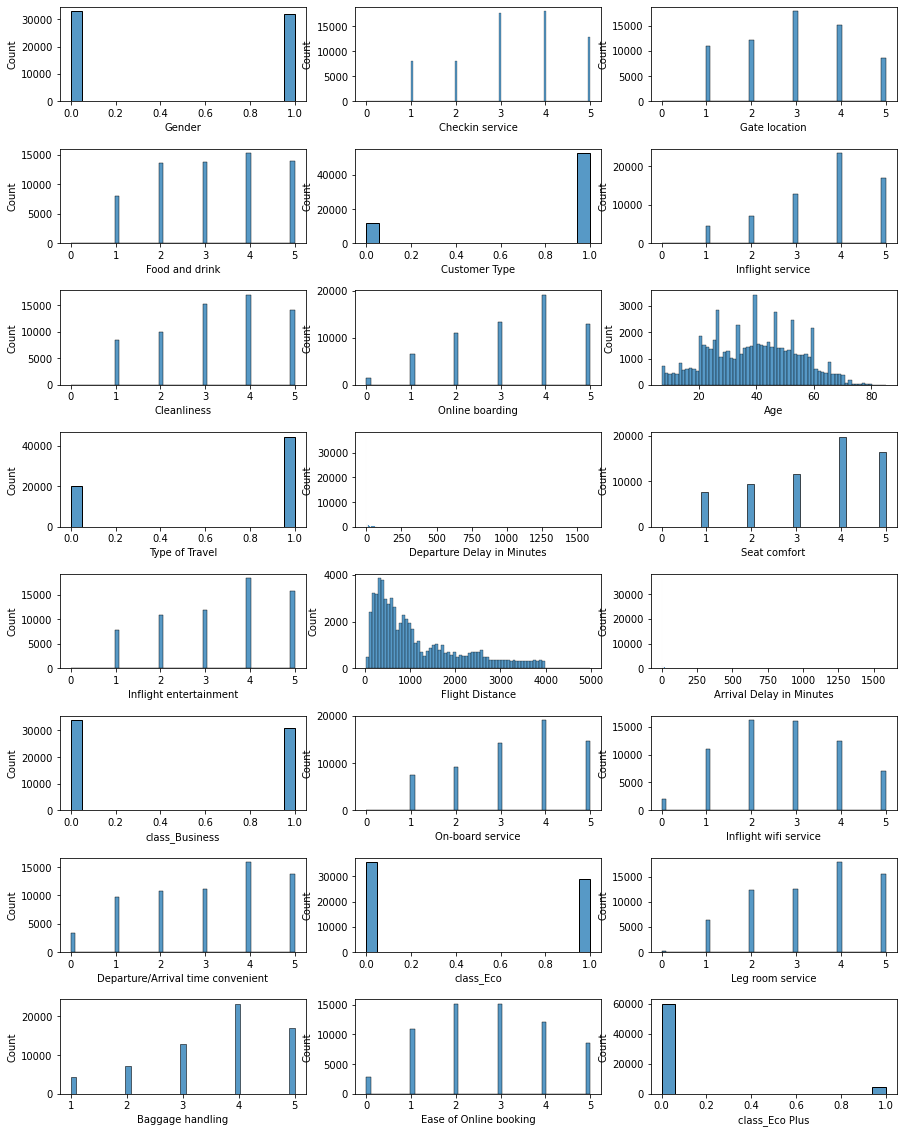

In [ ]:
# Your code here
fig, axs = plt.subplots(8, 3, figsize=(15,20))
new_df = df.drop('satisfaction', axis=1)

for index, col in enumerate(new_df.columns):
  i = index % 8
  j = index % 3
  sns.histplot(data=new_df[col], ax=axs[i, j])

plt.subplots_adjust(hspace = 0.5)

**เช็คจำนวน data ในแต่ละ class ของ y**

In [ ]:
# Your code here

***

# Logistic regression

**Train model Ligistic Regression โดยกำหนด solver='liblinear'**

In [ ]:
# Create model named 'clf_lr' - use solver='liblinear'
# your code here


# Train model
# your code here

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

**คำนวณ Cross-validation**

In [ ]:
# Predict named 'lr_y_pred'
# your code here


In [ ]:
# your code here


Test data accuracy score: 87.0%
Cross val score: 0.87


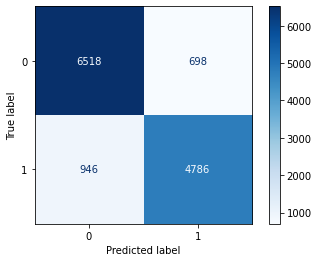

In [ ]:
# Confusion matrix
plot_confusion_matrix(clf_lr, X_test, y_test, cmap='Blues', values_format='d')

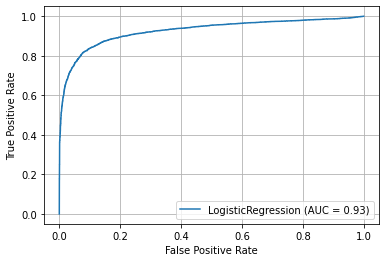

In [ ]:
# AUC ROC curve
# your code here


ตรวจสอบค่า Coefficient ของโมเดล

In [ ]:
# your code here


array([[ 5.79747434e-02,  1.99151065e+00, -9.03320642e-03,
         2.70999754e+00, -3.16528829e-05,  3.85197116e-01,
        -1.27200376e-01, -1.67526978e-01,  3.46927700e-02,
        -4.41854860e-02,  6.01797381e-01,  5.91934681e-02,
         9.52964276e-02,  2.94408976e-01,  2.49172776e-01,
         1.09799249e-01,  3.46440361e-01,  1.14470469e-01,
         2.23196561e-01,  5.07560753e-03, -1.00576968e-02,
        -2.18631738e+00, -2.93080553e+00, -3.02765232e+00]])

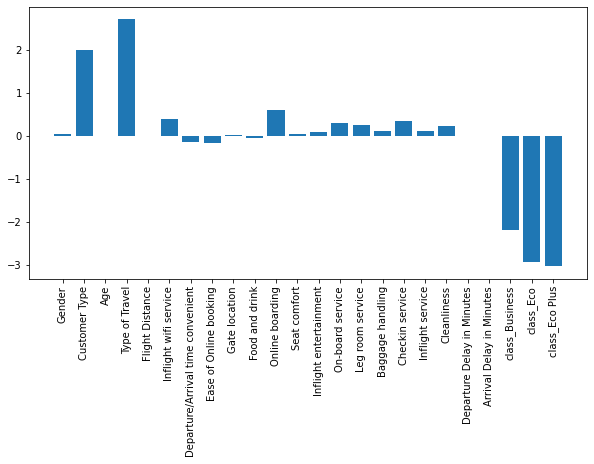

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(X_train.columns, clf_lr.coef_[0])
plt.xticks(rotation=90)
plt.show()

# Decission Tree

**Train model Decision Tree**

In [ ]:
# Create model named 'clf_dt' กำหนด random_state=10
# your code here


# Train model
# your code here


# Predict named 'dt_y_pred'
# your code here

**คำนวณ Cross-validation**

In [ ]:
# Print Test data accuracy score
# your code here

# ใช้ cross_val_score เพื่อคำนวณ Cross-Validation กำหนด K-fold = 10
# your code here

# เรียกดูค่า Cross-Validation ในแต่ละรอบ
print('Cross val score')
# your code here

# แสดงค่าเฉลี่ย Cross-Validation score
# your code here

Test data accuracy score: 94.0%
Cross val score
 Fold 1: 0.946555452579549
 Fold 2: 0.9389867160951498
 Fold 3: 0.9490268767377201
 Fold 4: 0.9388322520852641
 Fold 5: 0.9482545566882916
 Fold 6: 0.9406858202038925
 Fold 7: 0.9477911646586346
 Fold 8: 0.9445474204510349
 Fold 9: 0.9406858202038925
 Fold 10: 0.9493279777537463
Mean Cross val score: 0.9444694057457175


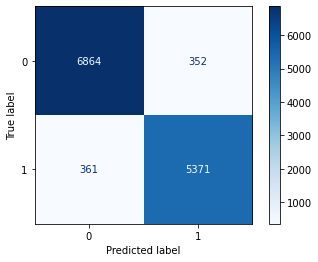

In [ ]:
# Confusion matrix
plot_confusion_matrix(clf_dt, X_test, y_test, cmap='Blues', values_format='d')

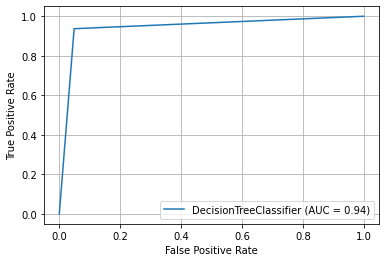

In [ ]:
# Plot AUC curve
# your code here


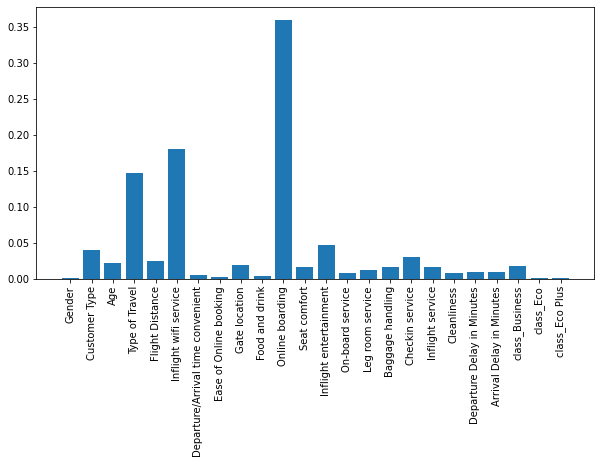

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(X_train.columns, clf_dt.feature_importances_)
plt.xticks(rotation=90)
plt.show()

## Feature selection

**สร้าง model Desicion Tree โดยเลือกเฉพาะ feature: 'Age', 'Inflight wifi service', 'Leg room service','Online boarding', 'class_Business'**

In [ ]:
# X_train_filter
# your code here


In [ ]:
# Create model named 'clf_dt_2' กำหนด random_state=10
# your code here


# Train model
# your code here


# Predict named 'clf_dt2_y_pred' 
# your code here

**คำนวณ Cross-Validation**

In [ ]:
# Print Test data accuracy score
# your code here

# ใช้ cross_val_score เพื่อคำนวณ Cross-Validation กำหนด K-fold = 10
# your code here

# เรียกดูค่า Cross-Validation ในแต่ละรอบ
print('Cross val score')
# your code here

# แสดงค่า Mean Cross-Validation score
# your code here


Test data accuracy score: 92.0%
Cross val score
 Fold 1: 0.933271547729379
 Fold 2: 0.924158171146123
 Fold 3: 0.9287920914426938
 Fold 4: 0.9274019153537226
 Fold 5: 0.9247760271856658
 Fold 6: 0.9270929873339512
 Fold 7: 0.9283286994130368
 Fold 8: 0.9298733395118938
 Fold 9: 0.9263206672845227
 Fold 10: 0.9272362119573614
Mean Cross val score: 0.9277251658358349


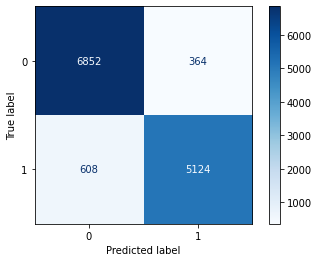

In [ ]:
# Confusion matrix
plot_confusion_matrix(clf_dt_2, X_test_filter, y_test, cmap='Blues', values_format='d')

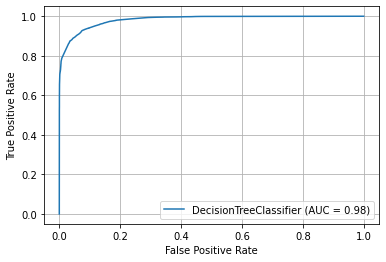

In [ ]:
# Plot AUC curve
# your code here


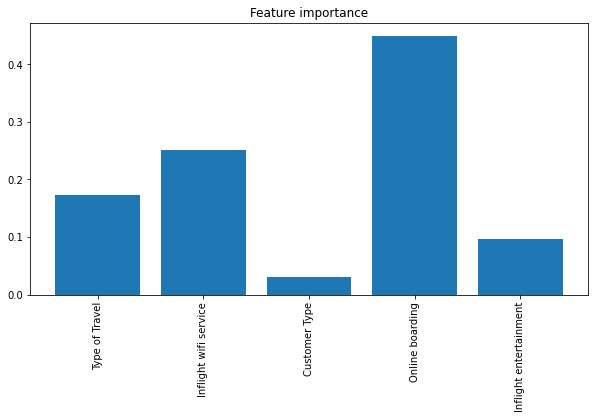

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(X_train_filter.columns, clf_dt_2.feature_importances_)
plt.xticks(rotation=90)
plt.title('Feature importance')
plt.show()

# SVM

**Train SVM model ด้วย `svm.SVC()` โดยกำหนด max_iter=10000, kernel='linear' และ C=2**

In [ ]:
# Create model named 'clf_svm'
# your code here

# Fit model
# your code here


print(f'Test data accuracy score: {np.round(clf_svm.score(x_test, y_test), 2)*100}%')

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Test data accuracy score: 38.0%


**Train SVM model ด้วย `svm.SVC()` โดยกำหนด max_iter=10000, kernel='linear' และ C=10**

In [ ]:
# Create model named 'clf_svm'
# your code here

# Fit model
# your code here



print(f'Test data accuracy score: {np.round(clf_svm.score(x_test, y_test), 2)*100}%')

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Test data accuracy score: 64.0%


**Question:** model ไหนให้ผลดีกว่า?

**ลองใช้ `GridSearchCV` โดยกำหนด hyperparameters ดังนี้**
```python
param_grid = [
  {'C': [10, 100], 'kernel': ['linear']},
  {'C': [10, 100], 'gamma': [0.01, 0.001], 'kernel': ['rbf']},
 ]
 ```

 Hint: for scoring option see this [link](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter)

In [ ]:
# Your code here
from sklearn.model_selection import GridSearchCV
# Create param_grid
# your code here

# Create GridSearchCV กำหนด max_iter=10000, random_state=10
# your code here


In [ ]:
# Fit GridSearchCV
# your code here


In [ ]:
results = gs.cv_results_

**แสดงค่า best parameter**

In [ ]:
# your code here


{'C': 1, 'kernel': 'linear'}

**Train model SVM โดยใช้ best params**

In [ ]:
# Create model named 'clf_svm' กำหนด max_iter=10000, kernel='linear', C=1
# your code here

# Fit model
# your code here

# Predict model named 'svm_y_pred'
# your code here

print(f'Test data accuracy score: {np.round(clf_svm.score(x_test, y_test), 2)*100}%')

In [ ]:
# วาด Confusion matrix
plot_confusion_matrix(clf_svm, x_test, y_test, cmap='Blues', values_format='d')

In [ ]:
# Plot ROC curve
# your code here


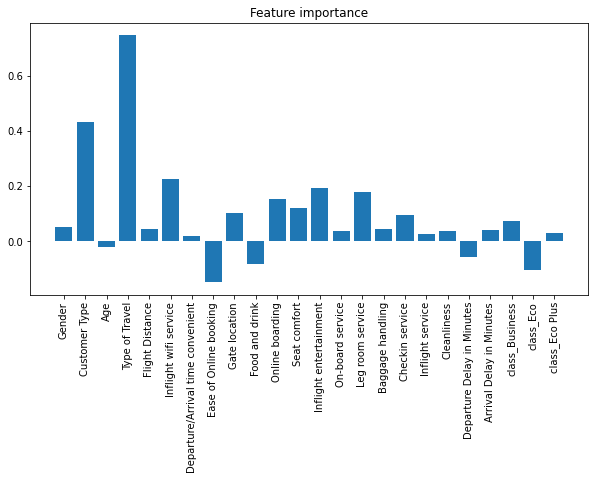

In [ ]:
# Draw feature important chart using -> clf_svm.coef_[0]
plt.figure(figsize=(10, 5))
plt.bar(X_train.columns, clf_svm.coef_[0])
plt.xticks(rotation=90)
plt.title('Feature importance')
plt.show()

# KNN

**Train model KNN ด้วย `KNeighborsClassifier()` โดยกำหนด n_neighbors=5**

In [ ]:
# Fit your KNN model here
# for k in range(2, 11):
k = 5
# Create model named 'clf_knn'
# your code here


# Fit model
# your code here

# Predict named 'knn_y_pred'
# your code here


print(f'Test data accuracy score (K = {k}): {np.round(clf_knn.score(x_test, y_test), 2)*100}%')

Test data accuracy score (K = 5): 73.0%


**คำนวณ Cross validation score**

In [ ]:
# use cross_val_score กำหนด K-fold = 10
# Your code here

# แสดงค่า Cross-Validation ในแต่ละรอบ
# your code here

# แสดงค่าเฉลี่ยของ Cross-Validation
# your code here

Fold 0 - Accuracy: 0.7255174544331171
Fold 1 - Accuracy: 0.735248687055916
Fold 2 - Accuracy: 0.736793327154773
Fold 3 - Accuracy: 0.7333951189372876
Fold 4 - Accuracy: 0.7346308310163732
Fold 5 - Accuracy: 0.7343219029966018
Fold 6 - Accuracy: 0.7320049428483163
Fold 7 - Accuracy: 0.7434352795798579
Fold 8 - Accuracy: 0.7344763670064874
Fold 9 - Accuracy: 0.7386065193882281
Mean 0.7348430430416958


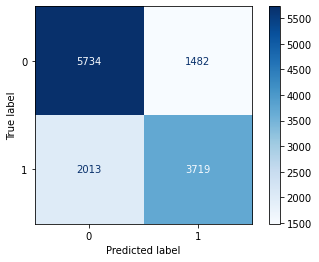

In [ ]:
# วาด Confusion matrix
plot_confusion_matrix(clf_knn, x_test, y_test, cmap='Blues', values_format='d')

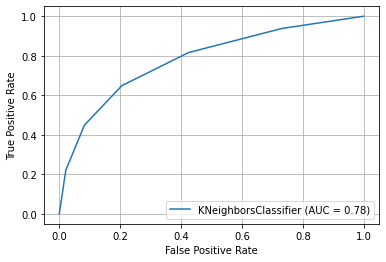

In [ ]:
# Plot ROC curve
# your code here


***
# Ensemble

For more info: [A Comprehensive Guide to Ensemble Learning (with Python codes)](https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/)

**ทำ Majority Vote เพื่อเลือกผลลัพท์ที่ Model ทำนายออกมาเหมือนกันมากที่สุด**

In [ ]:
# สร้าง DataFrame ของค่า predict แต่ละ model
# ถ้าพบ Error. ตรวจสอบชื่อตัวแปร y_pred ของแต่ละ model ว่าตรงกับด้านบนที่ทำไว้ไหม
voting_df = pd.DataFrame({'lr':lr_y_pred, 'dt_1':dt_y_pred, 
                          'dt_2':clf_dt2_y_pred, 'svm':svm_y_pred, 
                          'knn':knn_y_pred})

In [ ]:
voting_df

,lr,dt_1,dt_2,svm,knn
0,1,1,1,1,1
1,1,1,1,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,1,0,1
...,...,...,...,...,...
12943,0,0,0,1,0
12944,0,0,0,1,1
12945,0,0,0,0,0
12946,0,0,0,1,1


หาผลรวมการทำนายของทุก model

In [ ]:
# your code here


In [ ]:
voting_df

0        5
1        3
2        0
3        0
4        2
        ..
12943    1
12944    2
12945    0
12946    2
12947    1
Length: 12948, dtype: int64

**สร้างผลลัพธ์โดยกำหนดว่าถ้าผลรวมการทำนาย >= 3 ให้ทำนายเป็น 1 ถ้าไม่ใช่ = 0**

In [ ]:
# your code here


In [ ]:
print('Result:')
print(result)
print()
print('Accuracy Score:')
print(accuracy_score(y_test, result))

Result:
0        1
1        1
2        0
3        0
4        0
        ..
12943    0
12944    0
12945    0
12946    0
12947    0
Length: 12948, dtype: int64

Accuracy Score:
0.9072443620636391
